<center><img src="img/logo_hse_black.jpg"></center>

<h1><center>Data Analysis</center></h1>
<h2><center>Seminar: Clustering</center></h2>

In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt

RND_SEED = 123
plt.style.use('ggplot')

numpy.random.seed(RND_SEED)

%matplotlib inline

# Применение K-means

Загрузите [данные](https://github.com/brenden17/sklearnlab/blob/master/facebook/snsdata.csv) в которых содержится описание интересов профилей учеников старшей школы США.

In [2]:
df_sns = pd.read_csv('data/snsdata.csv', sep=',')
df_sns.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


Данные устроены так: 
* Год выпуска
* Пол
* Возраст
* Количество друзей
* 36 ключевых слов, которые встречаются в профилe facebook (интересы, сообщества, встречи)

#### Задание

* Удалите все признаки кроме 36 ключевых слов.
* Нормализуйте данные - из каждого столбца вычтите его среднее значение и поделите на стандартное отклонение.
* Используйте метод k-means чтобы выделить 9 кластеров
* Попробуйте проинтерпретировать каждый кластер проанализировав полученные центройды (Некоторые кластеры могут быть очень большие и очень маленькие - плохо интерпретируются)

In [11]:
X = df_sns.iloc[:, -36:].values

In [12]:
X = (X - X.mean(axis=0))/X.std(axis=0)

In [10]:
from sklearn.cluster import KMeans

In [13]:
kmeans = KMeans(n_clusters=9, random_state=123)

In [14]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

In [15]:
labels = kmeans.labels_

In [17]:
labels.shape

(30000,)

In [18]:
X.shape

(30000, 36)

In [21]:
df_sns.loc[:, 'label'] = labels

In [22]:
df_sns.label.value_counts()

4    20024
0     5036
1     1337
6      846
8      841
2      752
3      697
7      466
5        1
Name: label, dtype: int64

In [23]:
df_sns_words = df_sns.iloc[:, -36:]

In [25]:
df_sns_words = df_sns_words.groupby('label').mean()

In [28]:
for k in range(0,9):
    print('cluster: {}'.format(k))
    print(df_sns_words.loc[k].nlargest(10))

cluster: 0
music       1.066521
dance       1.051033
shopping    0.890191
cute        0.828435
hair        0.691223
mall        0.652502
football    0.617752
god         0.573272
church      0.496426
softball    0.477562
Name: 0, dtype: float64
cluster: 1
drunk       1.409873
music       0.707554
hair        0.629020
god         0.522064
dance       0.439043
cute        0.384443
sex         0.380703
shopping    0.326103
mall        0.287210
die         0.275991
Name: 1, dtype: float64
cluster: 2
band        4.105053
marching    1.418883
music       1.215426
god         0.505319
dance       0.464096
hair        0.371011
rock        0.344415
shopping    0.289894
football    0.275266
cute        0.275266
Name: 2, dtype: float64
cluster: 3
soccer      4.901004
music       0.773314
shopping    0.499283
god         0.469154
hair        0.440459
dance       0.398852
football    0.397418
cute        0.337159
church      0.321377
rock        0.318508
Name: 3, dtype: float64
cluster: 4
music    

## Иерархическая кластеризация: Пищевая ценность продуктов

Загрузите файл `food.txt`. В нем содержится информация о пищевой ценности разных продуктов

In [29]:
df = pd.read_csv('data/food.txt', sep=' ')
df.head()

,Name,Energy,Protein,Fat,Calcium,Iron
0,Braised beef,340,20,28,9,2.6
1,Hamburger,245,21,17,9,2.7
2,Roast beef,420,15,39,7,2.0
3,Beefsteak,375,19,32,9,2.6
4,Canned beef,180,22,10,17,3.7


* Подготовте данные к кластеризации 
    * Выделите признаки в матрицу X (numpy array)
    * Отнормируйте признаки

In [30]:
X = df.iloc[:, 1:]

In [31]:
X = (X - X.mean(axis=0))/X.std(axis=0)

* Произведите иерархическую кластеризацию этого набора данных (метод `linkage`)
* Выберите тип пересчета расстояния между кластерами с помощью кофенетической корреляции

In [32]:
from scipy.cluster.hierarchy import fcluster, dendrogram, linkage, cophenet

In [33]:
Z = linkage(X, method='average', metric='euclidean')

* Изобразите дендрограмму
    * Сначала просто посмотрите на результат метода `dendrogram`
    * Сделаем визуализацию более наглядной:
        * Выделите названия продуктов в numpy array c названием `names`
        * Выполните `dendrogram`  аргументами `orientation='left'`, `labels=names`
        * Теперь мы должны увидеть, что дендрограмма транспонировалась и вместо безымянных индексов мы имеем наименования объектов

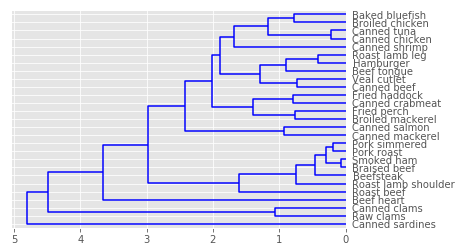

In [42]:
names = df.Name.values
dend = dendrogram(Z, labels=names, orientation='left', color_threshold=0)

* Выделите кластеры по дендрограмме с помощью метода `fcluster`
    * Наличие кластеров, состоящих из одного объекта - нормальное явление, если это можно объяснить

In [43]:
labels = fcluster(Z, 2.7, criterion='distance')

In [45]:
df.loc[:, 'labels'] = labels

In [46]:
for i, gr in df.groupby('labels'):
    print('Cluster {}'.format(i))
    print(gr)

Cluster 1
            Name  Energy  Protein  Fat  Calcium  Iron  labels
16     Raw clams      70       11    1       82   6.0       1
17  Canned clams      45        7    1       74   5.4       1
Cluster 2
                   Name  Energy  Protein  Fat  Calcium  Iron  labels
0          Braised beef     340       20   28        9   2.6       2
2            Roast beef     420       15   39        7   2.0       2
3             Beefsteak     375       19   32        9   2.6       2
9   Roast lamb shoulder     300       18   25        9   2.3       2
10           Smoked ham     340       20   28        9   2.5       2
11           Pork roast     340       19   29        9   2.5       2
12        Pork simmered     355       19   30        9   2.4       2
Cluster 3
                Name  Energy  Protein  Fat  Calcium  Iron  labels
1          Hamburger     245       21   17        9   2.7       3
4        Canned beef     180       22   10       17   3.7       3
5    Broiled chicken     115      

## DBSCAN: Геоданные

In [47]:
import mpl_toolkits.basemap as bm
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

Загрузите геоданные из `geo_data.txt` (lat, lon).

Будем пытаться кластеризовать данные с помощью DBSCAN и меры [haversine](https://en.wikipedia.org/wiki/Haversine_formula)

In [48]:
df_geo = pd.read_csv('data/geo_data.txt', sep='\t', header=None,
                     names=['lat', 'lon'])/10000

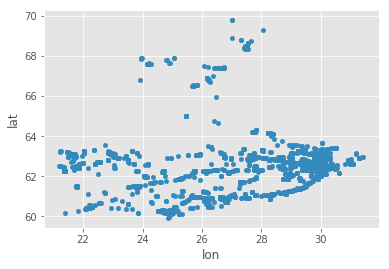

In [57]:
df_geo.plot(x='lon', y='lat', kind='scatter')

In [50]:
def plot_geo(lat, lon, labels=None):    
    try:
        lllat, lllon = lat.min()-1, lon.max()+1
        urlat, urlon = lat.max()+1, lon.min()-1

        plt.figure(figsize=(10, 10))

        m = bm.Basemap(
            llcrnrlon=lllon,
            llcrnrlat=lllat,
            urcrnrlon=urlon,
            urcrnrlat=urlat, 
            projection='merc',
            resolution='h'
        )

        m.drawcoastlines(linewidth=0.5)
        m.drawmapboundary(fill_color='#47A4C9', zorder=1)
        m.fillcontinents(color='#EBC4D8',lake_color='#47A4C9', zorder=2)

        parallels = np.linspace(lllat, urlat, 10)
        m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
        # draw meridians
        meridians = np.linspace(urlon, lllon, 10)
        m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

        m.scatter(lon, lat, latlon=True, cmap=plt.cm.jet,
              zorder=3, lw=0, c=labels)
    except:
        print('что-то пошло не так')
        plt.scatter(x=lon, y=lat, c=labels, cmap=plt.cm.jet)
        plt.axis('equal')

Для начала нарисуем все точки на карте

/Users/andrey.shestakov/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Users/andrey.shestakov/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


что-то пошло не так


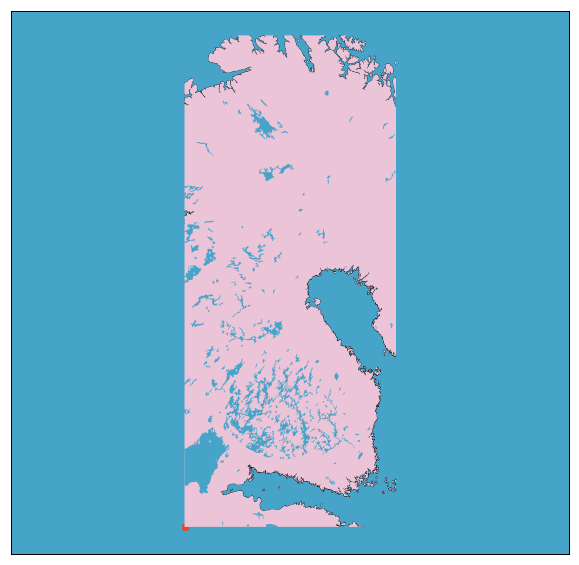

In [51]:
plot_geo(df_geo.loc[:, 'lat'].values, df_geo.loc[:, 'lon'].values)

Это данные с check-in людей в foursquare. В данных могут быть ошибки и просто непопулярные заведения.

Мы будем использовать расстояние haversine - на входе требуются координаты в **радианах**. Выход тоже будет в радианах. Чтобы перейти от градусов в радианты мы можем вспомнить тригонометрию, а можем воспользоваться функцией `np.radians`.

Для кого, чтобы не терять связь с реальностью, будем иметь ввиду, что расстояние в 1 радиан на земном шаре равно примерно 6371.0088 километрам.

Создайте матрицу X с координатами в радианах

In [59]:
import numpy as np

In [60]:
km_in_radian = 6371.0088
X = np.radians(df_geo.values)

Как же определить, какие параметры для DBSCAN выставлять? Наибольшую проблемы представляет параметр eps.

Будем считать, что MinPts нам дан свыше  например для себя мы определили, что кластером будет считаться группа из **минимум** 20 точек - MinPts = 20). Воспользуемся следующим способом оценки:

* Расчитайте расстояние до k=MinPts ближайшего соседа каждой точки (класс `NearestNeighbors` и метод `kneighbors`)
* Отсортируйте полученный массив и выведите его на график
* По графику будет примерно понятно, сколько точек уйдет в шум, а сколько попадет в полноценный кластер при всевозможных `eps`
* Выберите eps, при котором график начинает "уходить вверх" (примерно 0.02-0.06, если все было сделано верно)

In [64]:
min_pts = 20
nn = NearestNeighbors(n_neighbors=min_pts, metric='haversine')
nn.fit(X)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='haversine',
         metric_params=None, n_jobs=1, n_neighbors=20, p=2, radius=1.0)

In [65]:
d, ind = nn.kneighbors(X, n_neighbors=min_pts, return_distance=True )

In [66]:
d.shape

(13467, 20)

In [68]:
d = d[:, -1]

In [69]:
d = np.sort(d)

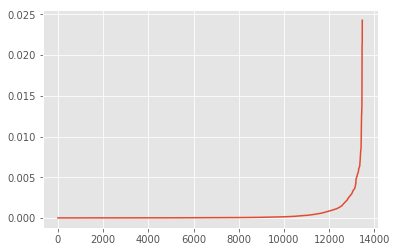

In [70]:
plt.plot(d)

Определим eps мы можем начать кластеризацию

* Создайте экземпляр класса DBSCAN, кластеризуйте данные
* Выведите полученные метки кластеров и их частоты
* Интерпретировать кластеры может оказаться затруднительно, но можно избавить от выборов и посмотреть на результат
    * Изобразите координаты точек, не попавших в кластер выбросов (метка -1) 

In [71]:
from sklearn.cluster import DBSCAN

In [81]:
dbscan = DBSCAN(eps=0.005, min_samples=min_pts, metric='haversine')
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.005, leaf_size=30, metric='haversine',
    metric_params=None, min_samples=20, n_jobs=1, p=None)

In [82]:
labels = dbscan.labels_

In [83]:
df_labels = pd.Series(data=labels)

In [84]:
df_labels.value_counts()

 0    12229
 3      410
 1      263
 2      167
 4      118
-1      106
 6       65
 7       41
 5       26
 8       22
 9       20
dtype: int64

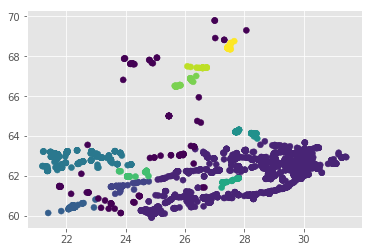

In [88]:
plt.scatter(df_geo.lon, df_geo.lat, c=labels)